# Fake News Prediction Naive Bays
<img src="https://www.datasciencecentral.com/wp-content/uploads/2022/01/9922845287.jpeg" align="center">

### Dataset

From Kaggle [Fake and real news dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

### Basic imports

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Collecting Data

About data :
2 csv files one has all the real / true news and other has fake news
- Fake.csv - contains 23k examples of fake news
- True.csv  - contains 21k examples of true news

In [37]:
fake = pd.read_csv('/content/drive/MyDrive/Fake News Prediction/Fake.csv')
true = pd.read_csv('/content/drive/MyDrive/Fake News Prediction/True.csv')


In [38]:
fake.shape , true.shape

((23481, 4), (21417, 4))

In [39]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [40]:
fake.text[50]

'Jared Kushner, senior White House adviser and son-in-law of President Donald Trump, was interviewed by special counsel Robert Mueller s office at the beginning of November, according to a source familiar with the process. As part of an interview that lasted approximately 90 minutes, Kushner was quizzed mainly on his interactions, meetings, and any general contact he had with former national security adviser Michael Flynn, as well as his son, in regards to Flynn s private business dealings with his firm, Flynn Intel Group. Mr. Kushner has voluntarily cooperated with all relevant inquiries and will continue to do so,  Kushner s attorney, Abbe Lowell, said in a statement given to NBC News.The news of Kushner s interview first came to light when grand jury testimony related to Flynn s private business dealings was postponed by prosecutors working for Mueller, the reason for which is still unclear. This postponement came just a week after Flynn s attorneys alerted President Trump s legal t

In [41]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Both datasets conatains 4 coloumns , the coloumns are :- 
- Title - title of the news
- Text - what all text the news article has
- Subject - whats the news about
- Date - the date of the news

In [42]:
fake.subject.unique() , true.subject.unique()

(array(['News', 'politics', 'Government News', 'left-news', 'US_News',
        'Middle-east'], dtype=object),
 array(['politicsNews', 'worldnews'], dtype=object))

let us make a new coloums in both the datasets,let us say 'isFake' and set the values as following:
- 0 for true news dataset
- 1 for fake news dataset

In [43]:
true["isFake"] = 0
fake["isFake"] = 1

In [44]:
true.head()

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [45]:
fake.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [46]:
# now lets merge the two datasets into one as it will be easier to classify in a single dataset rather than 2 datasets
df = pd.concat([true, fake], axis=0)

In [47]:
df.index = [i for i in range(df.shape[0])]

In [48]:
df

,title,text,subject,date,isFake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [49]:
df.shape ## 21k + 23k = 44k

(44898, 5)

### Visualization and other EDA

In [50]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

Text(0.5, 1.0, 'Data distribution of fake and real data')

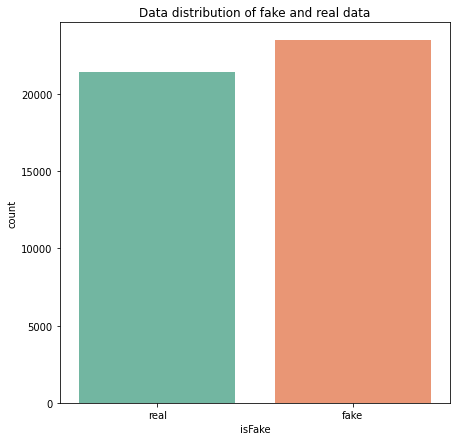

In [51]:
import seaborn as sns

plt.figure(figsize=(7, 7))
color = sns.color_palette("Set2")
ax = sns.countplot(x="isFake", data=df, palette=color)
ax.set(xticklabels=['real', 'fake'])
plt.title("Data distribution of fake and real data")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

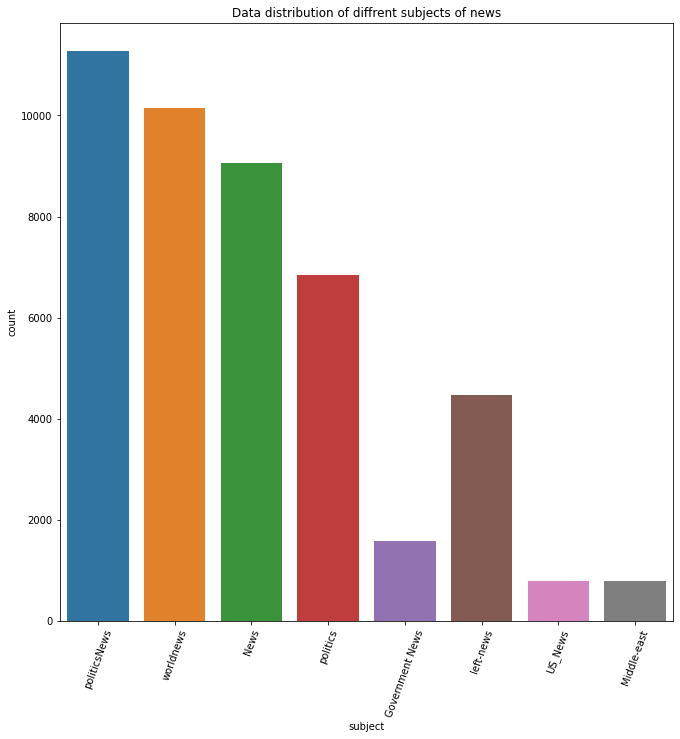

In [52]:
plt.figure(figsize =(11, 11))
plt.title("Data distribution of diffrent subjects of news")
ax = sns.countplot(x="subject", data=df)
plt.xticks(rotation =70)

lets check for the missing values in our dataset(combined)

In [53]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

we dont have any missing values in our data , thats great 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

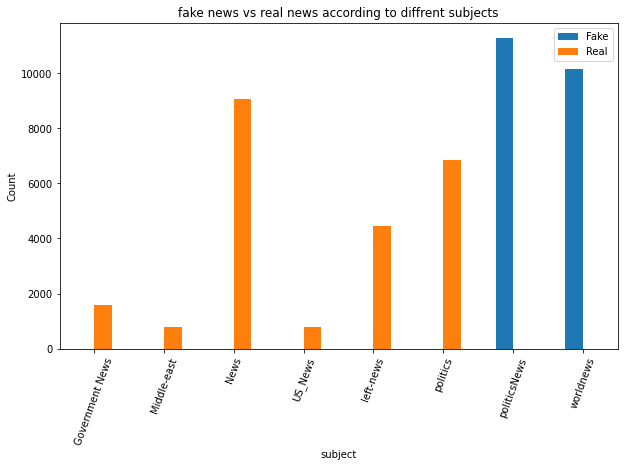

In [54]:
pd.crosstab(df.subject,df.isFake).plot(kind="bar",figsize=(10,6))

plt.title("fake news vs real news according to diffrent subjects")
plt.ylabel("Count")
plt.legend(["Fake","Real"]);
plt.xticks(rotation =70)

### More EDA

In [55]:
#SHUFFLING THE DATASET
df = df.sample(frac = 1)

In [56]:
df

,title,text,subject,date,isFake
40773,WOW! SARCASTIC MIKE BARNICLE Gets An Earful Fr...,BARNICLE: So you re asking the Democrats to be...,left-news,"Jan 4, 2017",1
32400,WATCH SEAN SPICER Slam Hillary With Great Spor...,Sean Spicer gave Hillary Clinton a little dig ...,politics,"May 3, 2017",1
23832,DISTURBING Footage Between Trump And Melania ...,If you ve ever watched Donald Trump and his wi...,News,"February 23, 2017",1
19039,Second group of refugees to leave Australian c...,SYDNEY (Reuters) - A second group of about 30 ...,worldnews,"September 26, 2017",0
28136,WATCH: The Craziest Public Service Announceme...,Just imagine yourself at the bar with friends....,News,"April 25, 2016",1
...,...,...,...,...,...
35414,PRIORITIES: Obama Puts Illegals Before Social ...,Anyone who s been paying attention can tell yo...,politics,"May 2, 2016",1
26083,"Ivanka Trump Shares Famous Jewish Quote, But ...","Ordinarily, it s not cool to go after a presid...",News,"September 12, 2016",1
9793,House Democrats question if Valeant is withhol...,WASHINGTON (Reuters) - Democrats on a powerful...,politicsNews,"April 26, 2016",0
9761,Elections get dirty as adult filmmakers set up...,"SACRAMENTO, Calif. (Reuters) - California poli...",politicsNews,"April 28, 2016",0


In [57]:
df = pd.concat([pd.get_dummies(df["subject"]), df], axis=1)
#df = df.drop("subject", axis=1)
df

,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews,title,text,subject,date,isFake
40773,0,0,0,0,1,0,0,0,WOW! SARCASTIC MIKE BARNICLE Gets An Earful Fr...,BARNICLE: So you re asking the Democrats to be...,left-news,"Jan 4, 2017",1
32400,0,0,0,0,0,1,0,0,WATCH SEAN SPICER Slam Hillary With Great Spor...,Sean Spicer gave Hillary Clinton a little dig ...,politics,"May 3, 2017",1
23832,0,0,1,0,0,0,0,0,DISTURBING Footage Between Trump And Melania ...,If you ve ever watched Donald Trump and his wi...,News,"February 23, 2017",1
19039,0,0,0,0,0,0,0,1,Second group of refugees to leave Australian c...,SYDNEY (Reuters) - A second group of about 30 ...,worldnews,"September 26, 2017",0
28136,0,0,1,0,0,0,0,0,WATCH: The Craziest Public Service Announceme...,Just imagine yourself at the bar with friends....,News,"April 25, 2016",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35414,0,0,0,0,0,1,0,0,PRIORITIES: Obama Puts Illegals Before Social ...,Anyone who s been paying attention can tell yo...,politics,"May 2, 2016",1
26083,0,0,1,0,0,0,0,0,"Ivanka Trump Shares Famous Jewish Quote, But ...","Ordinarily, it s not cool to go after a presid...",News,"September 12, 2016",1
9793,0,0,0,0,0,0,1,0,House Democrats question if Valeant is withhol...,WASHINGTON (Reuters) - Democrats on a powerful...,politicsNews,"April 26, 2016",0
9761,0,0,0,0,0,0,1,0,Elections get dirty as adult filmmakers set up...,"SACRAMENTO, Calif. (Reuters) - California poli...",politicsNews,"April 28, 2016",0


### Modelling

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

X = df.copy()

score = []
kfold = StratifiedKFold(n_splits=5)

for train, valid in kfold.split(X, X.isFake):
    X_train = X.loc[train]
    X_valid = X.loc[valid]
    y_train = X_train.pop("isFake")
    y_valid = X_valid.pop("isFake")
    
    vc = CountVectorizer()
    X_count_train = vc.fit_transform(X_train.title.values)
    X_count_valid = vc.transform(X_valid.title.values)
    
    nb = MultinomialNB()
    nb.fit(X_count_train, y_train)
    
    score.append(nb.score(X_count_valid, y_valid))
    print(nb.score(X_count_valid, y_valid))

vc = CountVectorizer()
df_count = vc.fit_transform(df.title.values)
#np.append(df_count, df[pd.get_dummies(df["subject"]).columns.values].values)
df_count.shape

print("=====================================================")
print(np.mean(score))
nb = MultinomialNB()
nb.fit(df_count, df.isFake)

0.6884187082405345
0.9060133630289532
0.9385300668151447
0.9664773360062368
0.9034413631807551
0.8805761674543249


MultinomialNB()

### Predicting 

In [59]:
def predict(X):
    X_count = vc.transform(X.values)
    return nb.predict(X_count)
def predict_proba(X):
    X_count = vc.transform(X.values)
    #np.append(df_count, df[pd.get_dummies(df["subject"]).columns.values].values)
    return nb.predict_proba(X_count)